In [33]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [36]:
# Create an empty list to store dataframes for each file
dfs = []

# Directory where your text files are located
text_files_dir = "E:\B Tech project work\methodology"

# Loop through each text file in the directory
for filename in os.listdir(text_files_dir):
    if filename.endswith(".txt"):
        file_path = os.path.join(text_files_dir, filename)
        with open(file_path, "r", encoding="utf8") as file:
            content = file.read()
            df = pd.DataFrame({"File Name": [filename], "Content": [content]})
            dfs.append(df)

# Concatenate all dataframes into one
data = pd.concat(dfs, ignore_index=True)

# Save the DataFrame to an csv file
output_csv_file = "output_data.csv"
data.to_csv(output_csv_file, index=False)

print(f"Data has been saved to {output_csv_file}")

Data has been saved to output_data.csv


In [46]:
df = pd.read_csv("output_data.csv")
df.head()

,File Name,Content
0,206_method.txt.txt,"A. Materials\nFoamed nickel (FN, a thickness o..."
1,207_method.txt.txt,"Nickel foam (NF) (1.6 mm thickness, 350 g m–2)..."
2,208_method.txt.txt,Experimental section \n2.1. Materials preparat...
3,209_method.txt.txt,Experimental section\nDetailed accounts of UV/...
4,210_method.txt.txt,Experimental \n2.1. Synthesis of TiNiW nanopar...


In [38]:
df.isna().sum()

File Name     0
Content      14
dtype: int64

In [40]:
df.dropna(subset=['Content'], inplace=True)

In [41]:
text = " ".join(cat.split()[1] for cat in df.Content)

In [42]:
stop_words = ["of", "the", "this", "paper", "are", "have", "with", "and", "to", "in", "we", "i", "review", "c", "report", "recent", "new", "power", "study", "we", "work", "like", "article"]

In [43]:
word_cloud = WordCloud(collocations = False, stopwords = stop_words, background_color = 'white', width=3200, height=1600).generate(text)

In [49]:
# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis("off")
# #plt.show()
# plt.savefig("wordcloud.png", format="png", dpi=300)

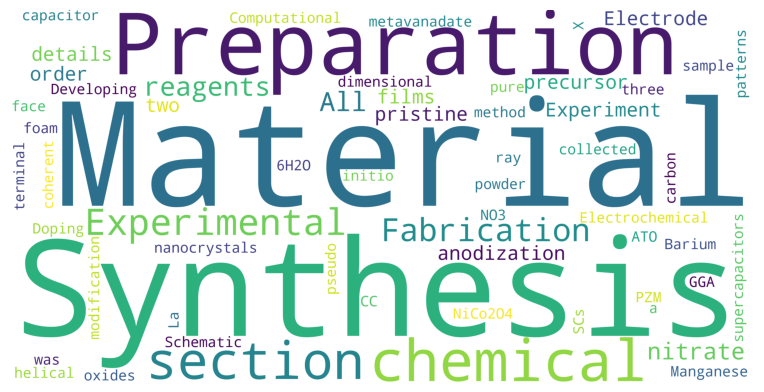

In [44]:
plt.figure(figsize = (8, 4), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 1.0)

# Saving the wordcloud
plt.savefig("wordcloud1.png", format="png", dpi=1200, pad_inches=0.1,)
plt.show()